In [1]:
#------------------------------------------------ Assignment - 02 -------------------------------------------------------#

In [3]:
# Question 2.

In [5]:
# Part (i):

import pandas as pd

# Read the TSV file
df = pd.read_csv("gwas-association-file.tsv", sep="\t")
df.head()


,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,...,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV,MAPPED_TRAIT,MAPPED_TRAIT_URI,STUDY ACCESSION,GENOTYPING TECHNOLOGY
0,2018-12-18,29360470,Miron J,2018-01-19,Alzheimers Dement,www.ncbi.nlm.nih.gov/pubmed/29360470,CDK5RAP2 gene and tau pathophysiology in late-...,Late-onset Alzheimer's disease,966 Quebec (founder/genetic isolate) ancestry ...,"340 cases, 195 controls",...,49.000000,NaN,NaN,NaN,Illumina [NR],N,late-onset Alzheimers disease,http://www.ebi.ac.uk/efo/EFO_1001870,GCST006806,Genome-wide genotyping array
1,2017-03-24,27770636,Mez J,2016-10-20,Alzheimers Dement,www.ncbi.nlm.nih.gov/pubmed/27770636,"Two novel loci, COBL and SLC10A2, for Alzheime...",Late-onset Alzheimer's disease,"1,825 African American ancestry cases, 3,784 A...",NaN,...,6.000000,(liability model),0.09,[0.051-0.129] unit decrease,NR [19725427] (imputed),N,late-onset Alzheimers disease,http://www.ebi.ac.uk/efo/EFO_1001870,GCST003815,Genome-wide genotyping array
2,2017-03-24,27770636,Mez J,2016-10-20,Alzheimers Dement,www.ncbi.nlm.nih.gov/pubmed/27770636,"Two novel loci, COBL and SLC10A2, for Alzheime...",Late-onset Alzheimer's disease,"1,825 African American ancestry cases, 3,784 A...",NaN,...,5.221849,(liability model),0.09,[0.051-0.129] unit decrease,NR [19725427] (imputed),N,late-onset Alzheimers disease,http://www.ebi.ac.uk/efo/EFO_1001870,GCST003815,Genome-wide genotyping array
3,2017-03-24,27770636,Mez J,2016-10-20,Alzheimers Dement,www.ncbi.nlm.nih.gov/pubmed/27770636,"Two novel loci, COBL and SLC10A2, for Alzheime...",Late-onset Alzheimer's disease,"1,825 African American ancestry cases, 3,784 A...",NaN,...,5.096910,(liability model),0.09,[0.051-0.129] unit decrease,NR [19725427] (imputed),N,late-onset Alzheimers disease,http://www.ebi.ac.uk/efo/EFO_1001870,GCST003815,Genome-wide genotyping array
4,2017-03-24,27770636,Mez J,2016-10-20,Alzheimers Dement,www.ncbi.nlm.nih.gov/pubmed/27770636,"Two novel loci, COBL and SLC10A2, for Alzheime...",Late-onset Alzheimer's disease,"1,825 African American ancestry cases, 3,784 A...",NaN,...,5.522879,(liability model),0.07,[0.031-0.109] unit decrease,NR [19725427] (imputed),N,late-onset Alzheimers disease,http://www.ebi.ac.uk/efo/EFO_1001870,GCST003815,Genome-wide genotyping array


In [7]:
# Filter for significant SNPs (P-value < 5E-8)
df_filtered = df[df["P-VALUE"] < 5E-8]

# Ensure UPSTREAM and DOWNSTREAM distances exist
if "UPSTREAM_GENE_DISTANCE" in df_filtered.columns and "DOWNSTREAM_GENE_DISTANCE" in df_filtered.columns:

    # Function to determine the closest gene distance
    def assign_closest_distance(row):
        if pd.notna(row["UPSTREAM_GENE_DISTANCE"]) and pd.notna(row["DOWNSTREAM_GENE_DISTANCE"]):
            return row["UPSTREAM_GENE_DISTANCE"] if abs(row["UPSTREAM_GENE_DISTANCE"]) < abs(row["DOWNSTREAM_GENE_DISTANCE"]) else -row["DOWNSTREAM_GENE_DISTANCE"]
        elif pd.notna(row["UPSTREAM_GENE_DISTANCE"]):
            return row["UPSTREAM_GENE_DISTANCE"]
        elif pd.notna(row["DOWNSTREAM_GENE_DISTANCE"]):
            return -row["DOWNSTREAM_GENE_DISTANCE"]
        else:
            return 0  # SNP is within the gene

    # Assign Distance to Closest Gene
    df_filtered["Distance_to_Closest_Gene"] = df_filtered.apply(assign_closest_distance, axis=1)

    # Select required columns
    df_final = df_filtered[['SNP_ID_CURRENT', 'MAPPED_GENE', 'Distance_to_Closest_Gene', 'P-VALUE']]

    # Saveing Excel file
    output_file = "MahimaMS_Alzheimers Significant SNPs.xlsx"
    df_final.to_excel(output_file, index=False)

    print("Data saved successfully")

else:
    print("Required columns are missing in the dataset, hence failed to SAVE")


C:\Users\mmsid\AppData\Local\Temp\ipykernel_15476\1010633793.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Distance_to_Closest_Gene"] = df_filtered.apply(assign_closest_distance, axis=1)


Data saved successfully


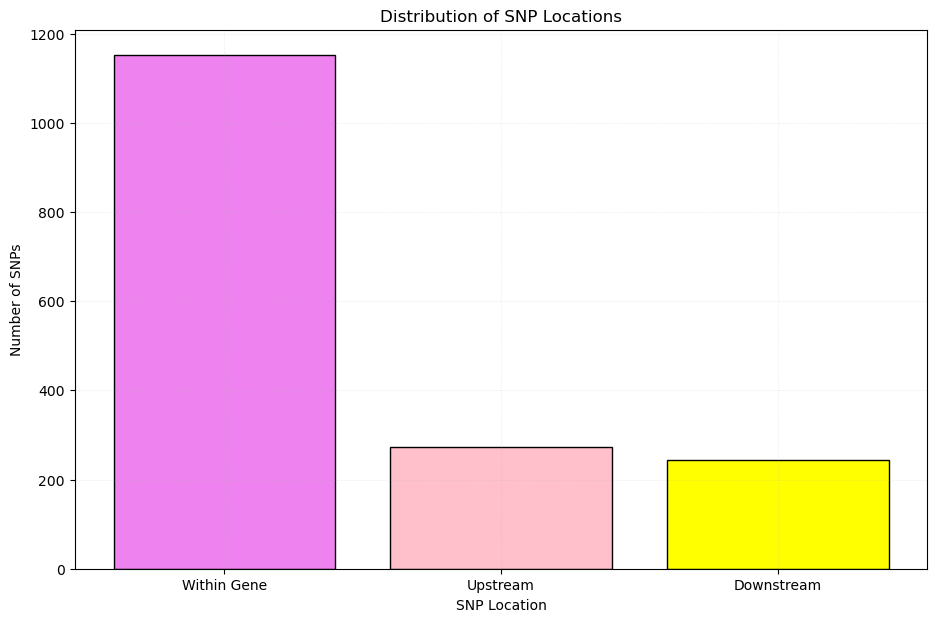

In [10]:
# Question (ii):

import pandas as pd
import matplotlib.pyplot as plt

# Load the filtered SNP data
df = pd.read_excel("MahimaMS_Alzheimers Significant SNPs.xlsx")

# Ensure 'Distance_to_Closest_Gene' column exists
if "Distance_to_Closest_Gene" not in df.columns:
    raise ValueError("Column 'Distance_to_Closest_Gene' not found in dataset.")
 

# Categorize SNP Locations
df["SNP_Location"] = df["Distance_to_Closest_Gene"].apply(
    lambda x: "Upstream" if x > 0 else "Downstream" if x < 0 else "Within Gene"
)

# Count SNPs in each category
location_counts = df["SNP_Location"].value_counts()

# Bar Plot for SNP Locations
plt.figure(figsize=(11, 7))
plt.bar(location_counts.index, location_counts.values, color=['Violet', 'Pink', 'Yellow'], edgecolor="black")
plt.xlabel("SNP Location")
plt.ylabel("Number of SNPs")
plt.title("Distribution of SNP Locations")
plt.grid(True)  
plt.grid(which='major', linestyle='--', linewidth=0.5, alpha=0.2)  
plt.show()


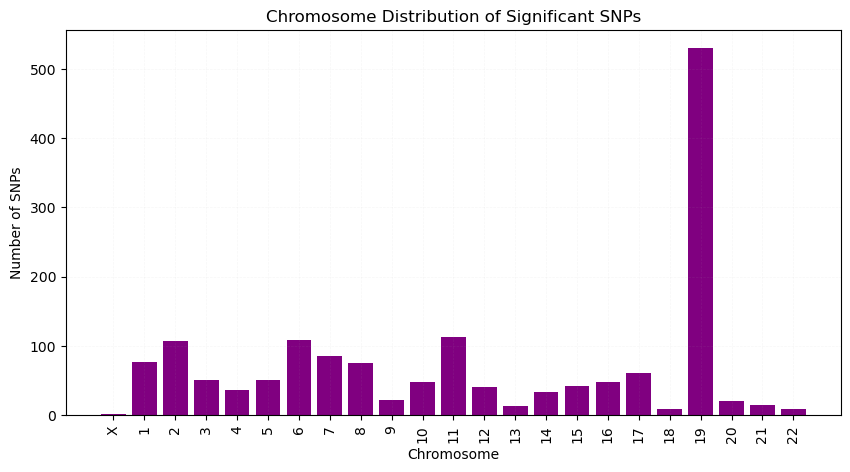

In [13]:
# Question (iii): 

import matplotlib.pyplot as plt

# Convert chromosome column to string correctly
df_filtered.loc[:, "CHR_ID"] = df_filtered["CHR_ID"].astype(str)

# Removing non-numeric chromosome IDs except "X", "Y"
df_filtered = df_filtered[df_filtered["CHR_ID"].str.match(r"^(\d+|X|Y)$")]

# Sorting the chromosomes
chrom_order = sorted(df_filtered["CHR_ID"].unique(), key=lambda x: (x.isdigit(), int(x) if x.isdigit() else float('inf')))

# Counting SNPs per chromosome
chrom_counts = df_filtered["CHR_ID"].value_counts().reindex(chrom_order, fill_value=0)

# Bar plot
plt.figure(figsize=(10, 5))
plt.bar(chrom_counts.index, chrom_counts.values, color='purple')
plt.xlabel("Chromosome")
plt.ylabel("Number of SNPs")
plt.title("Chromosome Distribution of Significant SNPs")
plt.xticks(rotation=90)  
plt.grid(which='major', linestyle='--', linewidth=0.5, alpha=0.1)
plt.show()


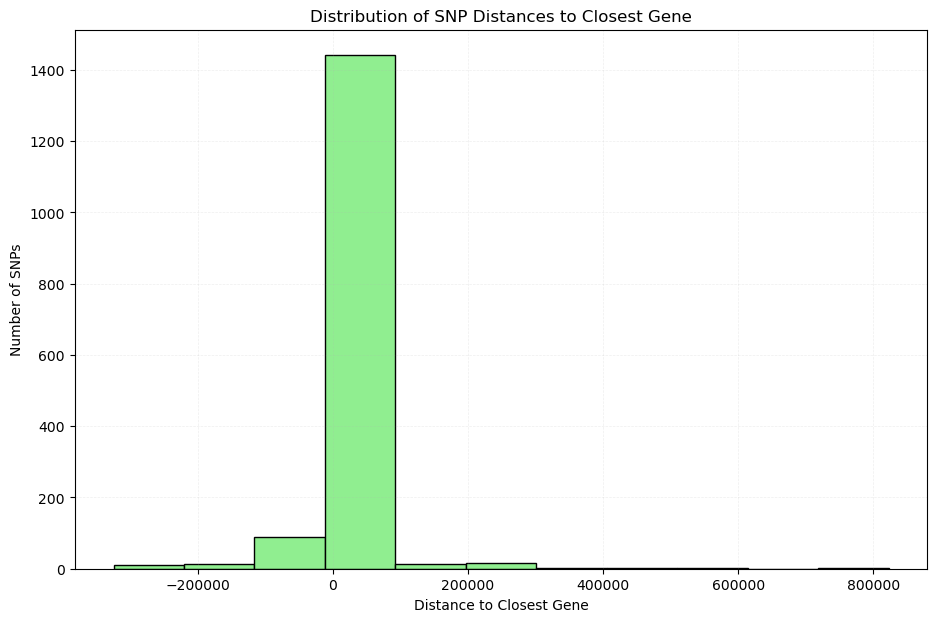

In [16]:
# Question (iv): 

# Histogram - Distance of SNPs to Closest Gene
plt.figure(figsize=(11, 7))
plt.hist(df_filtered["Distance_to_Closest_Gene"], bins=11, edgecolor="black", color="LightGreen")
plt.xlabel("Distance to Closest Gene")
plt.ylabel("Number of SNPs")
plt.title("Distribution of SNP Distances to Closest Gene")
plt.grid(True)  
plt.grid(which='major', linestyle='--', linewidth=0.5, alpha=0.2)  
plt.show()


In [19]:
import pandas as pd

# Define file paths and Load the datasets
Alzheimers_Data = "MahimaMS_Alzheimers Significant SNPs.xlsx"
EQTL_Data = "EQTL.tsv"
df_alz = pd.read_excel(Alzheimers_Data)
df_eqtl = pd.read_csv(EQTL_Data, sep="\t")

# Standardize Column Names
df_eqtl.columns = df_eqtl.columns.str.strip()

# Convert P-Value Columns to Float 
df_alz["P-VALUE"] = pd.to_numeric(df_alz["P-VALUE"], errors="coerce")

# Identify Brain Tissue Columns 
brain_tissue_cols = [col for col in df_eqtl.columns if col not in ["rsid", "geneSymbol", "aveALL"]]

# Convert all tissue expression p-values to float
for col in brain_tissue_cols:
    df_eqtl[col] = pd.to_numeric(df_eqtl[col], errors="coerce")

# Convert `SNP_ID_CURRENT` to String and Add "rs" Prefix
df_alz["SNP_ID_CURRENT"] = "rs" + df_alz["SNP_ID_CURRENT"].astype(str).str.split(".").str[0]

# Ensure `rsid` in eQTL dataset is also a string
df_eqtl["rsid"] = df_eqtl["rsid"].astype(str)

# Extract Upstream SNPs with Significant p-values (p < 5E-8)
df_upstream_snps = df_alz[(df_alz["Distance_to_Closest_Gene"] > 0) & (df_alz["P-VALUE"] < 5E-8)]

# Finding Minimum P-Value Across Brain Tissues for Each SNP
df_eqtl["min_p_value"] = df_eqtl[brain_tissue_cols].min(axis=1)

# Identify Tissues Where the SNP is an eQTL (p < 0.05)
df_eqtl["significant_tissues"] = df_eqtl[brain_tissue_cols].apply(
    lambda row: ', '.join(row.index[row < 0.05].tolist()) if row.notna().any() else "None", axis=1
)

# Merge GWAS SNPs with eQTL Data Using rsID
df_merged_eqtl = df_upstream_snps.merge(df_eqtl, left_on="SNP_ID_CURRENT", right_on="rsid", how="inner")

#  eQTLs with p-value < 0.05
df_eqtl_filtered = df_merged_eqtl[df_merged_eqtl["min_p_value"] < 0.05]

# Final Table with Required Columns
df_eqtl_final = df_eqtl_filtered[[
    "SNP_ID_CURRENT", "MAPPED_GENE", "min_p_value", "significant_tissues"
]].rename(columns={
    "SNP_ID_CURRENT": "eQTL",
    "MAPPED_GENE": "Associated Genes",
    "min_p_value": "p-value",
    "significant_tissues": "Tissues"
})

# Save the Processed eQTL Results to an Excel File
df_eqtl_final.to_excel("eQTL Associated Gene Results.xlsx", index=False)

# Display the first few rows of the final eQTL table
print(df_eqtl_final.head())

print("eQTL results saved successfully")



         eQTL Associated Genes   p-value Tissues
0  rs10402271   BCAM - NECTIN2  0.000120    SNIG
1   rs4420638  APOC1 - APOC1P1  0.000074    WHMT
2   rs4420638  APOC1 - APOC1P1  0.000100    FCTX
3   rs4420638  APOC1 - APOC1P1  0.000074    WHMT
4   rs4420638  APOC1 - APOC1P1  0.000100    FCTX
eQTL results saved successfully


In [21]:
import pandas as pd

# Load the final eQTL results file
file_path = "eQTL Associated Gene Results.xlsx"  
df = pd.read_excel(file_path)

# Remove exact duplicates
df_cleaned = df.drop_duplicates()

# Save the cleaned data 
cleaned_file_path = "MahimaMS_eQTL Associated Gene.xlsx"
df_cleaned.to_excel(cleaned_file_path, index=False)
print("Duplicates removed. Cleaned file saved")



Duplicates removed. Cleaned file saved
